# Comparison across mice strains
c57 vs SWISS without father (19-35) vs SWISS with father vs WILD without father vs WILD with father

In [2]:
# !pip install odfpy
# !pip install seaborn
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from yaml import Loader
import numpy as np
import analyze_cells_energy as ace
import utils
from scipy.stats import ttest_ind, mannwhitneyu

In [7]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'

c57_wf = 'C57_MaleUrine_Exposure_cFos'
c57_wof = 'BL_woF'
# swiss = 'SWISS_MaleUrine_Exposure'
wild_wf = 'WILD_with_father'
wild_wof = 'WILD_without_father'

subjects = ace.list_subjects(root_directory)

data_directory_c57_wf = root_directory + experiment + '/' \
                + c57_wf + '/'
data_directory_c57_wof = root_directory + experiment + '/' \
                + c57_wof + '/'
# data_directory_swiss = root_directory + experiment + '/' \
#                 + swiss + '/'
data_directory_wild_wf = root_directory + experiment + '/' \
                + wild_wf + '/'
data_directory_wild_wof = root_directory + experiment + '/' \
                + wild_wof + '/'

In [8]:
def subjects(data_directory):
    subjects = [name for name in os.listdir(data_directory) \
                    if os.path.isdir(os.path.join(data_directory, name))]
    return subjects

In [9]:
subjects_c57_wf = subjects(data_directory_c57_wf)
subjects_c57_wof = subjects(data_directory_c57_wof)
subjects_wild_wf = subjects(data_directory_wild_wf)
subjects_wild_wof = subjects(data_directory_wild_wof)

In [10]:
# subjects_swiss_with_father = [sub for sub in subjects_swiss if sub[0:2]=='SW' and int(sub[2:].split('_')[0]) in set(range(2,19))]


In [11]:
# subjects_swiss_without_father = [sub for sub in subjects_swiss if sub[0:2]=='SW' and int(sub[2:].split('_')[0]) in set(range(19,36))]

# Number of cells

In [12]:
def append_mouse_group(df, dictionary, group_label, variable_label='n_cells'):
    # NB: variable_label is either 'ncells' or 'energy'
    dataset = np.load('dict_results/dict_results_across_mice_'+dictionary+'.npy', allow_pickle=True).item()
    variable = [dataset[mouse][variable_label].sum() for mouse in dataset.keys()]
    df_mouse_group = pd.DataFrame(columns=[variable_label, 'group'])
    df_mouse_group[variable_label] = variable
    df_mouse_group['group'] = group_label
    df = df.append(df_mouse_group)
    return df

In [13]:
df = {'n_cells', 'group'}
df = pd.DataFrame(columns=['n_cells', 'group'])

df = append_mouse_group(df=df, dictionary='c57', group_label='c57 with father')
df = append_mouse_group(df=df, dictionary='BL_woF_17_31', group_label='c57 without father')
df = append_mouse_group(df=df, dictionary='WILD_with_father', group_label='WILD with father')
df = append_mouse_group(df=df, dictionary='WILD_without_father', group_label='WILD without father')

<AxesSubplot:xlabel='n_cells', ylabel='group'>

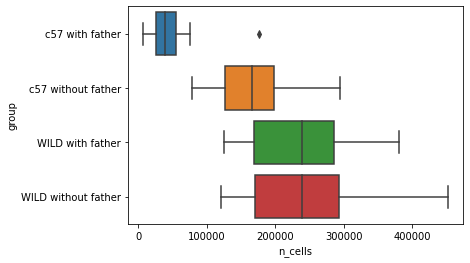

In [14]:
fig, ax = plt.subplots()
sns.boxplot(data=df, x="n_cells", y="group", ax=ax)
# fig.savefig('./figures/boxplot_ncells.png')

Text(0.5, 1.0, 'Black without father')

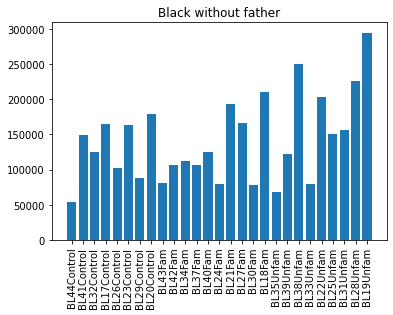

In [111]:
dataset = np.load('dict_results/dict_results_across_mice_BL_woF.npy', allow_pickle=True).item()
variable_control = [dataset[mouse]['n_cells'].sum() for mouse in dataset.keys() if mouse[-7:]=='Control']
variable_fam = [dataset[mouse]['n_cells'].sum() for mouse in dataset.keys() if mouse[-3:]=='Fam']
variable_unfam = [dataset[mouse]['n_cells'].sum() for mouse in dataset.keys() if mouse[-5:]=='Unfam']
variable = variable_control + variable_fam + variable_unfam
mouse_control = [mouse for mouse in dataset.keys() if mouse[-7:]=='Control']
mouse_fam = [mouse for mouse in dataset.keys() if mouse[-3:]=='Fam']
mouse_unfam = [mouse for mouse in dataset.keys() if mouse[-5:]=='Unfam']
mouse = mouse_control + mouse_fam + mouse_unfam
fig, ax = plt.subplots(1,1)
ax.bar(mouse, height=variable)
ax.tick_params(axis='x', labelrotation=90) 
ax.set_title('Black without father')

Text(0.5, 1.0, 'WILD with father')

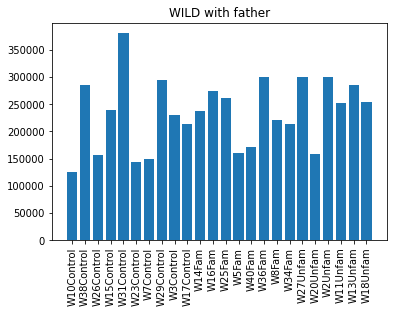

In [115]:
dataset = np.load('dict_results/dict_results_across_mice_WILD_with_father.npy', allow_pickle=True).item()
variable_control = [dataset[mouse]['n_cells'].sum() for mouse in dataset.keys() if mouse[-7:]=='Control']
variable_fam = [dataset[mouse]['n_cells'].sum() for mouse in dataset.keys() if mouse[-3:]=='Fam']
variable_unfam = [dataset[mouse]['n_cells'].sum() for mouse in dataset.keys() if mouse[-5:]=='Unfam']
variable = variable_control + variable_fam + variable_unfam
mouse_control = [mouse for mouse in dataset.keys() if mouse[-7:]=='Control']
mouse_fam = [mouse for mouse in dataset.keys() if mouse[-3:]=='Fam']
mouse_unfam = [mouse for mouse in dataset.keys() if mouse[-5:]=='Unfam']
mouse = mouse_control + mouse_fam + mouse_unfam
fig, ax = plt.subplots(1,1)
ax.bar(mouse, height=variable)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('WILD with father')

Text(0.5, 1.0, 'WILD without father')

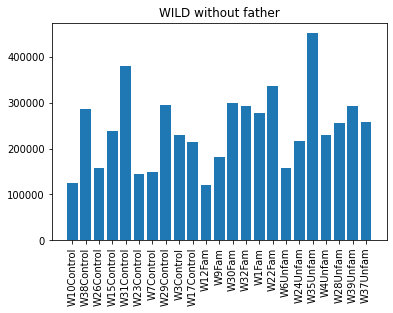

In [113]:
dataset = np.load('dict_results/dict_results_across_mice_WILD_without_father.npy', allow_pickle=True).item()
variable_control = [dataset[mouse]['n_cells'].sum() for mouse in dataset.keys() if mouse[-7:]=='Control']
variable_fam = [dataset[mouse]['n_cells'].sum() for mouse in dataset.keys() if mouse[-3:]=='Fam']
variable_unfam = [dataset[mouse]['n_cells'].sum() for mouse in dataset.keys() if mouse[-5:]=='Unfam']
variable = variable_control + variable_fam + variable_unfam
mouse_control = [mouse for mouse in dataset.keys() if mouse[-7:]=='Control']
mouse_fam = [mouse for mouse in dataset.keys() if mouse[-3:]=='Fam']
mouse_unfam = [mouse for mouse in dataset.keys() if mouse[-5:]=='Unfam']
mouse = mouse_control + mouse_fam + mouse_unfam
fig, ax = plt.subplots(1,1)
ax.bar(mouse, height=variable)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('WILD without father')

Text(0.5, 1.0, 'Black with father')

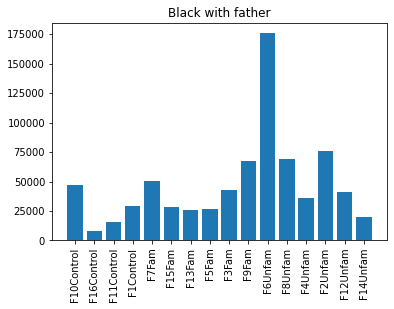

In [114]:
dataset = np.load('dict_results/dict_results_across_mice_c57.npy', allow_pickle=True).item()
variable_control = [dataset[mouse]['n_cells'].sum() for mouse in dataset.keys() if mouse[-7:]=='Control']
variable_fam = [dataset[mouse]['n_cells'].sum() for mouse in dataset.keys() if mouse[-3:]=='Fam']
variable_unfam = [dataset[mouse]['n_cells'].sum() for mouse in dataset.keys() if mouse[-5:]=='Unfam']
variable = variable_control + variable_fam + variable_unfam
mouse_control = [mouse for mouse in dataset.keys() if mouse[-7:]=='Control']
mouse_fam = [mouse for mouse in dataset.keys() if mouse[-3:]=='Fam']
mouse_unfam = [mouse for mouse in dataset.keys() if mouse[-5:]=='Unfam']
mouse = mouse_control + mouse_fam + mouse_unfam
fig, ax = plt.subplots(1,1)
ax.bar(mouse, height=variable)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Black with father')

# Energia

In [36]:
df = {'energy', 'group'}
df = pd.DataFrame(columns=['energy', 'group'])

df = append_mouse_group(df=df, dictionary='c57', group_label='c57 with father', 
                        variable_label='energy')
df = append_mouse_group(df=df, dictionary='BL_woF_17_31', group_label='c57 without father', 
                        variable_label='energy')
df = append_mouse_group(df=df, dictionary='WILD_with_father', group_label='WILD with father', 
                        variable_label='energy')
df = append_mouse_group(df=df, dictionary='WILD_without_father', group_label='WILD without father', 
                        variable_label='energy')

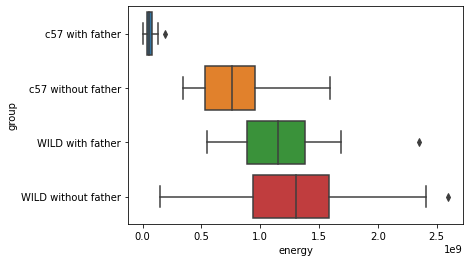

In [37]:
fig, ax = plt.subplots()
sns.boxplot(data=df, x="energy", y="group")
fig.savefig('./figures/boxplot_energy.png')